Current Bitcoin price: $57930.00
Predicted price (1 hour ahead): $57916.69
Prediction: Price will decrease by $13.31 (-0.02%)
Prediction visualization saved to results/prediction.png


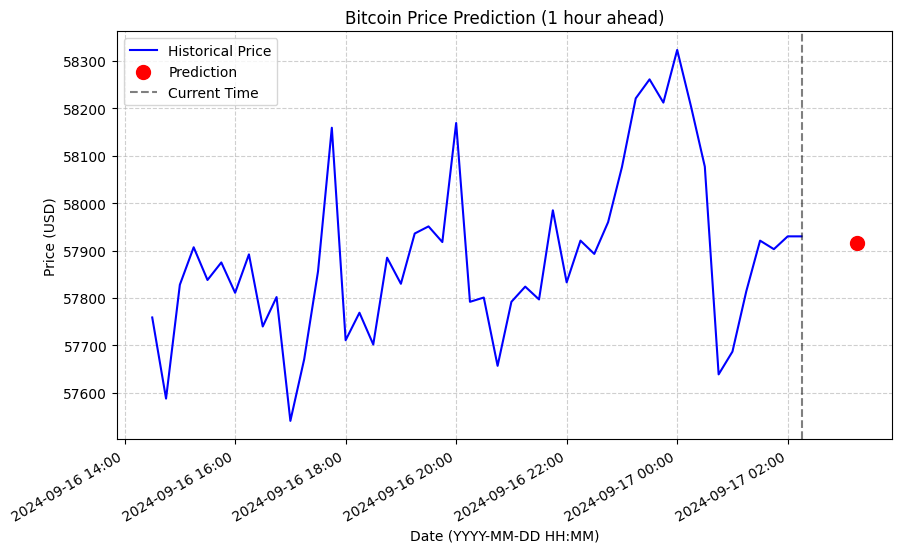

In [6]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def predict_future_price(data_path, model_path, periods_ahead=4):
    """
    Predict Bitcoin price using the trained model
    
    Parameters:
    data_path (str): Path to the prepared data
    model_path (str): Path to the saved model
    periods_ahead (int): Number of 15-minute periods to predict ahead (default: 4 = 1 hour)
    
    Returns:
    float: Predicted price
    """
    # Load the model
    model = joblib.load(model_path)
    
    # Load the data
    data = pd.read_csv(data_path, index_col=0, parse_dates=True)
    
    # Get the latest data point
    latest_data = data.iloc[-1:]
    
    # Get feature columns from the model
    feature_columns = model.feature_names_in_
    
    # Make sure all features are in the data
    missing_features = [col for col in feature_columns if col not in latest_data.columns]
    if missing_features:
        raise ValueError(f"Missing features: {missing_features}")
    
    # Make prediction
    prediction = model.predict(latest_data[feature_columns])
    
    return prediction[0]

if __name__ == "__main__":
    # Paths
    data_path = 'data_prepared_data_15min_2024.csv'
    model_path = 'models/optimized_random_forest_model.pkl'
    
    # Make prediction
    prediction = predict_future_price(data_path, model_path)
    
    # Load current price for comparison
    data = pd.read_csv(data_path, index_col=0, parse_dates=True)
    current_price = data['Close'].iloc[-1]
    
    # Print results
    print(f"Current Bitcoin price: ${current_price:.2f}")
    print(f"Predicted price (1 hour ahead): ${prediction:.2f}")
    
    # Calculate change
    change = prediction - current_price
    percent_change = (change / current_price) * 100
    
    if change > 0:
        print(f"Prediction: Price will increase by ${change:.2f} ({percent_change:.2f}%)")
    else:
        print(f"Prediction: Price will decrease by ${abs(change):.2f} ({percent_change:.2f}%)")
    
    # Create simple visualization
    plt.figure(figsize=(10, 6))
    
    # Plot last 48 data points (12 hours of 15-minute data)
    recent_data = data.iloc[-48:]
    plt.plot(recent_data.index, recent_data['Close'], label='Historical Price', color='blue')
    
    # Plot prediction point
    next_time = data.index[-1] + pd.Timedelta(minutes=60)
    plt.scatter(next_time, prediction, color='red', s=100, label='Prediction')
    
    # Add vertical line at current time
    plt.axvline(x=data.index[-1], color='black', linestyle='--', alpha=0.5, label='Current Time')
    
    # Improve date formatting with full year, month, day, hour, and minute
    date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')  # Year-Month-Day Hour:Minute
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()  # Auto-rotate date labels for better readability
    
    # Add grid for easier reading
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.title('Bitcoin Price Prediction (1 hour ahead)')
    plt.xlabel('Date (YYYY-MM-DD HH:MM)')
    plt.ylabel('Price (USD)')
    plt.legend()
    
    # Save figure
    os.makedirs('results', exist_ok=True)
    plt.savefig('results/prediction.png')
    
    print("Prediction visualization saved to results/prediction.png")